In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import copy
from sklearn.metrics import confusion_matrix, accuracy_score

c:\Users\arthu\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Questão 1

### Dataset


In [127]:
# Definindo os padrões de entrada (vértices do cubo)
entradas = np.array([
    [0, 0, 0],
    [0, 0, 1],
    [0, 1, 0],
    [0, 1, 1],
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1]
]).astype(float)

# Vetores de resposta associados a cada padrão de entrada
respostas = np.array([
    [1, -1, -1, -1, -1, -1, -1, -1],
    [-1, 1, -1, -1, -1, -1, -1, -1],
    [-1, -1, 1, -1, -1, -1, -1, -1],
    [-1, -1, -1, 1, -1, -1, -1, -1],
    [-1, -1, -1, -1, 1, -1, -1, -1],
    [-1, -1, -1, -1, -1, 1, -1, -1],
    [-1, -1, -1, -1, -1, -1, 1, -1],
    [-1, -1, -1, -1, -1, -1, -1, 1]
]).astype(float)

In [129]:
respostas[0]

array([ 1., -1., -1., -1., -1., -1., -1., -1.])

In [3]:
# Função para adicionar ruído já definida anteriormente
def adicionar_ruido(entradas, raio_ruido):
    entradas_ruidosas = np.copy(entradas)
    ruido = np.random.uniform(-raio_ruido, raio_ruido, entradas.shape)
    entradas_ruidosas += ruido
    return entradas_ruidosas

# Definindo o raio máximo do ruído
raio_ruido = 0.1

# Criando o conjunto de validação com ruído
conjunto_validacao = adicionar_ruido(entradas, raio_ruido)
conjunto_validacao

array([[ 0.02471852,  0.08211516,  0.0462219 ],
       [ 0.00283491, -0.04160092,  0.99252032],
       [ 0.04407801,  1.03793016, -0.03713921],
       [-0.06577794,  1.09034865,  0.98057293],
       [ 1.08552649, -0.0336995 ,  0.01301374],
       [ 0.91073295, -0.04552059,  0.91702884],
       [ 1.09687496,  0.97830764,  0.07166844],
       [ 1.04877242,  0.94042041,  0.93757316]])

In [4]:
X = entradas.T
Y = respostas.reshape((8, len(respostas)))

print ('Shape de X: ' + str(X.shape))
print ('Shape de Y: ' + str(Y.shape))
print ('Temos = %d exemplos de treinamento!' % (X.shape[1]))


The shape of X: (3, 8)
The shape of Y: (8, 8)
I have m = 8 training examples!


# Perceptron de Rosenblatt

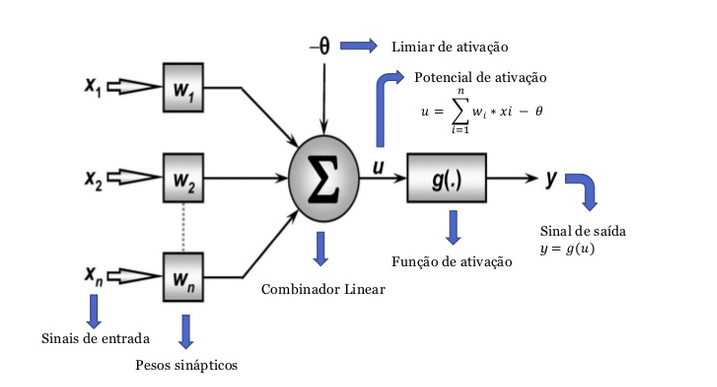

In [12]:
def initialize_parameters(n_x, n_y):
    W = np.random.randn(n_y, n_x) * 0.01 # Inicializa W com valores aleatórios pequenos
    b = np.zeros((n_y, 1)) # Inicializa b com zeros
    return {"W": W, "b": b}

def forward_propagation(X, parameters):
    W = parameters['W']
    b = parameters['b']
    Z = np.dot(W, X) + b # Combinador Linear + Bias(limiar de ativação)
    A = np.where(Z > 0, 1, -1)  # Função de ativação (Função degrau)
    return A # Sinal de saída

def update_parameters(parameters, X, Y, learning_rate):
    m = X.shape[1]  # Número de exemplos de treinamento
    W = parameters['W']
    b = parameters['b']
    for i in range(m):  # Iterar sobre cada exemplo de treinamento
        xi = X[:, [i]]  # Pegar a coluna i de X X[0] = [0, 0, 0] (3,1)
        yi = Y[:, [i]]  # Pegar a coluna i de Y Y[0] = [1, -1, -1, -1, -1, -1, -1, -1] (8,1)
        A = forward_propagation(xi, parameters)  # Previsão para o exemplo xi
        error = yi - A  # Calcula o erro como a diferença entre o desejado e o previsto
        for j in range(Y.shape[0]):  # Iterar sobre cada saída
            # Atualizar W e b para cada saída j baseado no erro
            W[j, :] = W[j, :] + learning_rate * error[j, 0] * xi.T # pega a linha inteira de W e atualiza
            b[j, 0] = b[j, 0] + learning_rate * error[j, 0] 
    parameters['W'] = W
    parameters['b'] = b
    return parameters

def nn_model(X, Y, num_iterations=100, learning_rate=0.001):
    n_x, n_y = X.shape[0], Y.shape[0]
    parameters = initialize_parameters(n_x, n_y)
    for i in range(num_iterations):
        parameters = update_parameters(parameters, X, Y, learning_rate)
    return parameters

In [13]:
def predict(parameters, X):
    W = parameters['W']
    b = parameters['b']
    Z = np.dot(W, X) + b
    A = np.where(Z > 0, 1, -1)  # Aplica a função sinal
    
    predictions = A
    return predictions


parameters = nn_model(X, Y)
# Realizando previsões com o modelo treinado
predictions = predict(parameters,conjunto_validacao.T)

# Agora, faça a iteração e imprima os resultados
for i in range(len(predictions)):
    # Assegure-se de que estamos comparando valores escalares
    acertou = "✅ Acertou" if np.array_equal(predictions[i], respostas[i])  else "❌ Errou"
    print(f"Entrada: {conjunto_validacao[i]} | Saída Prevista: {predictions[i]} | Esperado: {respostas[i]} | {acertou}")


Entrada: [0.02471852 0.08211516 0.0462219 ] | Saída Prevista: [ 1 -1 -1 -1 -1 -1 -1 -1] | Esperado: [ 1. -1. -1. -1. -1. -1. -1. -1.] | ✅ Acertou
Entrada: [ 0.00283491 -0.04160092  0.99252032] | Saída Prevista: [-1  1 -1 -1 -1 -1 -1 -1] | Esperado: [-1.  1. -1. -1. -1. -1. -1. -1.] | ✅ Acertou
Entrada: [ 0.04407801  1.03793016 -0.03713921] | Saída Prevista: [-1 -1  1 -1 -1 -1 -1 -1] | Esperado: [-1. -1.  1. -1. -1. -1. -1. -1.] | ✅ Acertou
Entrada: [-0.06577794  1.09034865  0.98057293] | Saída Prevista: [-1 -1 -1  1 -1 -1 -1 -1] | Esperado: [-1. -1. -1.  1. -1. -1. -1. -1.] | ✅ Acertou
Entrada: [ 1.08552649 -0.0336995   0.01301374] | Saída Prevista: [-1 -1 -1 -1  1 -1 -1 -1] | Esperado: [-1. -1. -1. -1.  1. -1. -1. -1.] | ✅ Acertou
Entrada: [ 0.91073295 -0.04552059  0.91702884] | Saída Prevista: [-1 -1 -1 -1 -1  1 -1 -1] | Esperado: [-1. -1. -1. -1. -1.  1. -1. -1.] | ✅ Acertou
Entrada: [1.09687496 0.97830764 0.07166844] | Saída Prevista: [-1 -1 -1 -1 -1 -1  1 -1] | Esperado: [-1. -1. 

# Questão 2

### Perceptron MLP

In [23]:
# Inicializa os parâmetros da rede neural para um modelo profundo
def initialize_parameters_deep(layer_dims):
    """
    Argumentos:
    layer_dims -- lista contendo as dimensões de cada camada da rede
    
    Retorna:
    parameters -- dicionário contendo os parâmetros "W1", "b1", ..., "WL", "bL":
                  Wl -- matriz de pesos da forma (layer_dims[l], layer_dims[l-1])
                  bl -- vetor de viés da forma (layer_dims[l], 1)
    """
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)  # Número de camadas na rede

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))

    return parameters

# Implementa a propagação linear para uma única camada
def linear_forward(A, W, b):
    """
    Argumentos:
    A -- ativações da camada anterior (ou dados de entrada): (tamanho da camada anterior, número de exemplos)
    W -- matriz de pesos: (tamanho da camada atual, tamanho da camada anterior)
    b -- vetor de viés: (tamanho da camada atual, 1)

    Retorna:
    Z -- a entrada da função de ativação, também chamada de pré-ativação
    cache -- uma tupla contendo "A", "W" e "b"; armazenado para a etapa de backpropagation
    """
    Z = np.dot(W, A) + b
    cache = (A, W, b)
    
    return Z, cache

# Implementa a função de ativação Sigmoid
def sigmoid(Z):
    A = 1 / (1 + np.exp(-Z))
    cache = Z
    return A, cache

# Implementa a função de ativação ReLU
def relu(Z):
    A = np.maximum(0, Z)
    cache = Z
    return A, cache

# Implementa a função de ativação Softmax
def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    A = expZ / (np.sum(expZ, axis=0, keepdims=True) + 1e-8)
    cache = Z
    return A, cache

# Implementa a função de ativação Linear
def linear_activation(Z):
    """
    A função de ativação Linear retorna a entrada sem modificações.
    
    Argumentos:
    Z -- Saída da camada linear
    
    Retorna:
    A -- Ativações, neste caso igual a Z
    cache -- Z copiado, armazenado para uso na backpropagation
    """
    A = Z
    cache = Z
    return A, cache

# Implementa a propagação para frente para a camada LINEAR->ACTIVATION
def linear_activation_forward(A_prev, W, b, activation):
    """
    Argumentos:
    A_prev -- ativações da camada anterior (ou dados de entrada): (tamanho da camada anterior, número de exemplos)
    W -- matriz de pesos: (tamanho da camada atual, tamanho da camada anterior)
    b -- vetor de viés: (tamanho da camada atual, 1)
    activation -- a função de ativação a ser usada na camada atual, armazenada como uma string: "sigmoid", "relu" ou "linear"
    
    Retorna:
    A -- a saída da função de ativação, também chamada de pós-ativação
    cache -- uma tupla contendo "linear_cache" e "activation_cache";
             armazenado para a etapa de backpropagation
    """
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    elif activation == "linear":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = linear_activation(Z)
    elif activation == "softmax_hidden" or activation == "softmax_output":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = softmax(Z)

    cache = (linear_cache, activation_cache)
    return A, cache


# Implementa a propagação para frente para o modelo [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID
def L_model_forward(X, parameters, hidden_activation='relu', output_activation='sigmoid'):
    """
    Argumentos:
    X -- dados de entrada, matriz de forma (tamanho da camada de entrada, número de exemplos)
    parameters -- saída de initialize_parameters_deep()
    hidden_activation -- a função de ativação a ser usada nas camadas ocultas
    output_activation -- a função de ativação a ser usada na camada de saída

    Retorna:
    AL -- última saída de ativação pós
    caches -- lista de caches contendo:
              cada cache de linear_activation_forward() (há L-1 delas, indexadas de 0 a L-2)
    """
    caches = []
    A = X
    L = len(parameters) // 2  # Número de camadas na rede

    
    for l in range(1, L):
        A_prev = A 
        # Aplica a função de ativação para todas as camadas ocultas
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation=hidden_activation)
        caches.append(cache)
    
    # Aplica a função de ativação para a camada de saída
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation=output_activation)
    caches.append(cache)
          
    return AL, caches

# Calcula o custo
def compute_cost(AL, Y, problema='regressao'):
    """
    Argumentos:
    AL -- vetor de ativações da última camada, correspondente à previsão: (1, número de exemplos)
    Y -- vetor de rótulos verdadeiros (para regressão) ou rótulos de classe (para classificação): (1, número de exemplos)
    problema -- tipo de problema, "regressao" ou "classificacao"

    Retorna:
    cost -- custo calculado
    """
    m = Y.shape[1]
    if problema == 'regressao':
        cost = (1./m) * np.sum(np.square(AL - Y)) # Custo quadrático médio (usado para regressão)
    elif problema == 'classificacao_binaria':
        cost = -(1./m) * (np.dot(Y, np.log(AL).T) + np.dot(1-Y, np.log(1-AL).T)) # Entropia cruzada binária (para problemas de classificação binária)
    elif problema == 'classificacao_multiclasse':
        cost = -(1./m) * np.sum(Y * np.log(AL + 1e-8))
    cost = np.squeeze(cost)  # Garante que o custo seja um escalar (e não um array de dimensão 1)
    return cost


def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache 
    m = A_prev.shape[1] 

    dW = (1/m) * np.dot(dZ, A_prev.T)
    db = (1/m) * np.sum(dZ, axis=1, keepdims=True) 
    dA_prev = np.dot(W.T, dZ)

    return dA_prev, dW, db

# Implementa a retropropagação para a função de ativação SIGMOID
def sigmoid_backward(dA, cache):
    """
    Argumentos:
    dA -- gradiente da ativação pós-sigmoid para os exemplos
    cache -- 'Z' onde armazenamos a saída linear (cache de ativação)

    Retorna:
    dZ -- Gradiente do custo em relação a Z
    """
    Z = cache
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s) # derivada da função de ativação SIGMOID
    return dZ

# Implementa a retropropagação para a função de ativação RELU
def relu_backward(dA, cache):
    """
    Argumentos:
    dA -- gradiente da ativação pós-relu para os exemplos
    cache -- 'Z' onde armazenamos a saída linear (cache de ativação)

    Retorna:
    dZ -- Gradiente do custo em relação a Z
    """
    Z = cache
    dZ = np.array(dA, copy=True) 
    dZ[Z <= 0] = 0 # derivada da função de ativação RELU
    return dZ

def softmax_backward(dA, cache):
    """
    Argumentos:
    dA -- gradiente da ativação pós-softmax para os exemplos
    cache -- 'Z' onde armazenamos a saída linear (cache de ativação)

    Retorna:
    dZ -- Gradiente do custo em relação a Z
    """
    Z = cache
    dZ = dA * (1 - dA) # derivada da função de ativação SOFTMAX
    return dZ

# Implementa a retropropagação para a camada LINEAR->ACTIVATION
def linear_activation_backward(dA, cache, activation):
    """
    Argumentos:
    dA -- gradiente pós-ativação para a camada atual l
    cache -- tupla de valores (linear_cache, activation_cache) armazenados para calcular a retropropagação de forma eficiente
    activation -- a ativação a ser usada na camada ("sigmoid" ou "relu")

    Retorna:
    dA_prev -- Gradiente do custo em relação à ativação da camada anterior (l-1), mesma forma que A_prev
    dW -- Gradiente do custo em relação a W (camada atual l), mesma forma que W
    db -- Gradiente do custo em relação a b (camada atual l), mesma forma que b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
    elif activation == "linear":
        dZ = dA
    elif activation == "softmax_hidden":
        dZ = softmax_backward(dA, activation_cache)
    elif activation == "softmax_output":
        dZ = dA
    dA_prev, dW, db = linear_backward(dZ, linear_cache)
    return dA_prev, dW, db

# Implementa a retropropagação para o modelo
def L_model_backward(AL, Y, caches, hidden_activation='relu', output_activation='sigmoid', problema='regressao'):
    """
    Argumentos:
    AL -- vetor de ativações da última camada, correspondente à previsão: (1, número de exemplos)
    Y -- vetor de rótulos verdadeiros (para regressão) ou rótulos de classe (para classificação): (1, número de exemplos)
    caches -- lista de caches contendo:
                cada cache de linear_activation_forward() (há L-1 delas, indexadas de 0 a L-2)
    hidden_activation -- a função de ativação a ser usada nas camadas ocultas
    output_activation -- a função de ativação a ser usada na camada de saída
    problema -- tipo de problema, "regressao" ou "classificacao"
    """
    
    grads = {} # Inicializa o dicionário de gradientes
    L = len(caches)  # número de camadas
    m = AL.shape[1] # número de exemplos
    Y = Y.reshape(AL.shape) # após esta linha, Y tem o mesmo formato que AL
    

    if problema == 'classificacao_binaria':   
        dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))  # Derivada da função de custo entropia cruzada binária
    elif problema == 'regressao':
        dAL = 2 * (AL - Y) / m # derivada do erro quadrático médio
    elif problema == 'classificacao_multiclasse':
        dAL = AL - Y # derivada da função de custo entropia cruzada categórica

    # Camada L (saída) gradientes.
    current_cache = caches[L-1] # cache da última camada

    # retropropagação da última camada
    dA_prev_temp, dW_temp, db_temp = linear_activation_backward(dAL, current_cache, activation=output_activation)
    
    # armazena os gradientes 
    grads["dA" + str(L-1)] = dA_prev_temp
    grads["dW" + str(L)] = dW_temp
    grads["db" + str(L)] = db_temp
    
    # Loop de l= L-2 até l=0
    for l in reversed(range(L-1)):
        # Camadas ocultas
        current_cache = caches[l]

        # retropropagação da camada l
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l+1)], current_cache, activation=hidden_activation)
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

# Atualiza os parâmetros usando o gradiente descendente
def update_parameters(params, grads, learning_rate=0.001):
    """
    Argumentos:
    params -- dicionário contendo os parâmetros 
    grads -- dicionário contendo os gradientes, saída do L_model_backward
    learning_rate -- taxa de aprendizado

    Retorna:
    parameters -- dicionário contendo os parâmetros atualizados
    """
    parameters = copy.deepcopy(params)
    L = len(parameters) // 2  # Número de camadas na rede neural

    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]

    return parameters


a) a função lógica XOR


In [79]:
# Definindo todas as possíveis entradas para a função XOR
x_samples = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# As saídas correspondentes para a função XOR
y_samples = np.array([0, 1, 1, 0])

# Usaremos todas as entradas para treinamento em um problema tão simples
x_train_a = x_samples
y_train_a = y_samples

Para a função XOR, é preferível usar funções de ativação não-lineares como a função sigmoid ou ReLU em todas as camadas ocultas. A função de ativação na camada de saída depende do tipo de problema que você está tentando resolver. No caso da função XOR, como é um problema de classificação binária, você geralmente usaria a função sigmoid na camada de saída para obter uma probabilidade como saída, que você pode então arredondar para obter uma previsão de classe binária (0 ou 1).

In [271]:
# Definindo a arquitetura da rede
layers_dims_a = [x_train_a.T.shape[0], 10, 1]  # 2 neurônios na camada de entrada, 5 na camada oculta e 1 na camada de saída

# Inicializando os parâmetros
parameters_a = initialize_parameters_deep(layers_dims_a)

# Listas para armazenar custos
costs_train_a = []

# Treinamento da rede Por Lote (Batch)
for i in range(20000):
     # Propagação para frente (treinamento)
    AL_a, caches_a = L_model_forward(x_train_a.T, parameters_a, hidden_activation='relu', output_activation='sigmoid')
    
    # Cálculo do custo (treinamento)
    cost_train_a = compute_cost(AL_a, y_train_a.reshape(1, -1), problema='classificacao_binaria')
    costs_train_a.append(cost_train_a)
    
    # Propagação para trás
    grads_a = L_model_backward(AL_a, y_train_a.reshape(1, -1), caches_a, hidden_activation='relu', 
                               output_activation='sigmoid', problema='classificacao_binaria')
    
    # Atualização dos parâmetros
    parameters_a = update_parameters(parameters_a, grads_a, learning_rate = 0.1)
    
    
    # Imprimir o custo a cada 1000 iterações
    if i % 1000 == 0:
        print(f"Iteração {i} - Custo: {cost_train_a}")


Iteração 0 - Custo: 0.6931582391754034
Iteração 1000 - Custo: 0.3552798944892661
Iteração 2000 - Custo: 0.0236620019962228
Iteração 3000 - Custo: 0.009962258756132915
Iteração 4000 - Custo: 0.006181720339517179
Iteração 5000 - Custo: 0.004440715422187531
Iteração 6000 - Custo: 0.003447217555064811
Iteração 7000 - Custo: 0.0028093401980465657
Iteração 8000 - Custo: 0.0023656775183469804
Iteração 9000 - Custo: 0.0020405857847849733
Iteração 10000 - Custo: 0.0017923136602690437
Iteração 11000 - Custo: 0.0015965218268419105
Iteração 12000 - Custo: 0.0014384920730772157
Iteração 13000 - Custo: 0.0013083563691140153
Iteração 14000 - Custo: 0.0011993079517059653
Iteração 15000 - Custo: 0.0011067504704648217
Iteração 16000 - Custo: 0.0010271770146447104
Iteração 17000 - Custo: 0.0009579918559994001
Iteração 18000 - Custo: 0.0008973803894442749
Iteração 19000 - Custo: 0.0008438889276323831


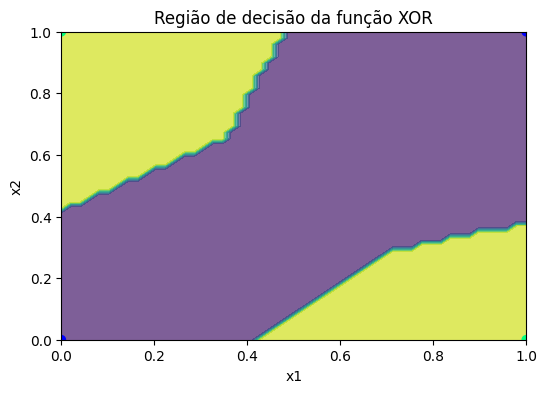

In [272]:
# Criar uma grade de pontos no intervalo de 0 a 1 (valores booleanos para XOR)
grid_x0, grid_x1 = np.meshgrid(np.linspace(0, 1, 50), np.linspace(0, 1, 50))
grid = np.c_[grid_x0.ravel(), grid_x1.ravel()]

# Previsões para cada ponto na grade
AL_grid, _ = L_model_forward(grid.T, parameters_a, hidden_activation='relu', output_activation='sigmoid')
predictions_grid = (AL_grid > 0.5).astype(int)

# Visualizar a região de decisão
plt.figure(figsize=(6, 4))  # Aumentar o tamanho da figura
plt.contourf(grid_x0, grid_x1, predictions_grid.reshape(grid_x0.shape), alpha=0.7)
plt.scatter(x_train_a[:, 0], x_train_a[:, 1], c=y_train_a, cmap=plt.cm.winter)
plt.title("Região de decisão da função XOR")
plt.xlabel("x1")
plt.ylabel("x2")
plt.xlim(0, 1)  # Definir limites do eixo x
plt.ylim(0, 1)  # Definir limites do eixo y
plt.show()


b) f(x) = log10(x), onde 1 ≤ x ≤ 10


In [70]:
# Definindo a função b
def function_b(x):
    return np.log10(x)

# Gerar amostras para x (100 amostras uniformemente espaçadas entre 1 e 10)
x_samples_b = np.linspace(1, 10, 100) # 100 amostras uniformemente espaçadas entre 1 e 10
y_samples_b = function_b(x_samples_b) 

# Dividindo as amostras em conjuntos de treinamento (80%), validação (20%) 
indices_b = np.random.permutation(len(x_samples_b))
train_indices_b = indices_b[:int(0.7*len(x_samples_b))]
val_indices_b = indices_b[int(0.7*len(x_samples_b)):int(0.85*len(x_samples_b))]
test_indices_b = indices_b[int(0.85*len(x_samples_b)):]

# reshape pra prevenir rank 1 array, e fazer a transposição para que cada amostra seja uma coluna
x_train_b = x_samples_b[train_indices_b].reshape(1, -1)
y_train_b = y_samples_b[train_indices_b].reshape(1, -1)
x_val_b = x_samples_b[val_indices_b].reshape(1, -1)
y_val_b = y_samples_b[val_indices_b].reshape(1, -1)
x_test_b = x_samples_b[test_indices_b].reshape(1, -1)
y_test_b = y_samples_b[test_indices_b].reshape(1, -1)

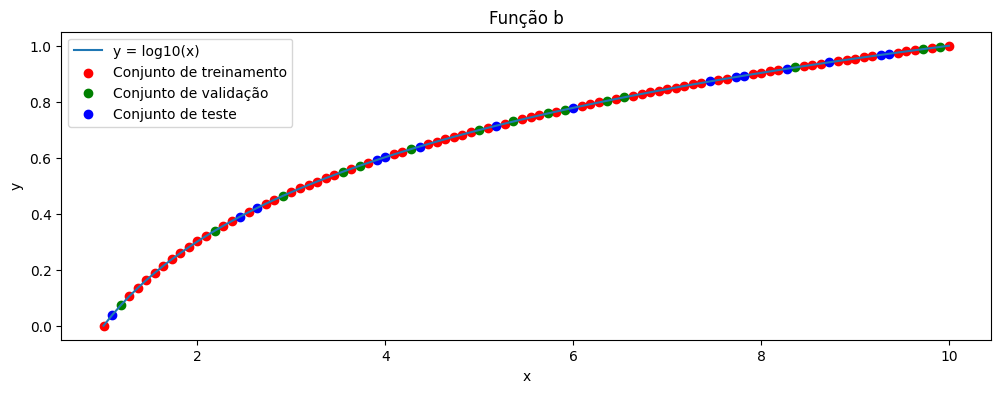

In [71]:
# plotar a função b
plt.figure(figsize=(12, 4))
plt.plot(x_samples_b, y_samples_b, label='y = log10(x)')
plt.scatter(x_train_b, y_train_b, color='r', label='Conjunto de treinamento')
plt.scatter(x_val_b, y_val_b, color='g', label='Conjunto de validação')
plt.scatter(x_test_b, y_test_b, color='b', label='Conjunto de teste')
plt.title('Função b')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


A camada de saída tem 1 neurônio, o que é típico para problemas de regressão, onde você está tentando prever um único valor contínuo.

In [72]:
# Definindo a arquitetura da rede
layer_dims_b = [x_train_b.shape[0], 100, 1]  # Exemplo: 1 neurônio na camada de entrada, 10 na oculta, 1 na saída para a função b

# Inicializando os parâmetros
parameters_b = initialize_parameters_deep(layer_dims_b)

# Lista para armazenar os custos de treinamento e validação
training_costs = []
validation_costs = []

# Treinamento do modelo Por Lote (Batch)
for i in range(10000):
    # Forward propagation
    AL_b, caches_b = L_model_forward(x_train_b, parameters_b, hidden_activation='relu', output_activation='linear')
    
    # Compute cost.
    cost_train = compute_cost(AL_b, y_train_b, problema='regressao')
    training_costs.append(cost_train)
    
    # Backward propagation.
    grads_b = L_model_backward(AL_b, y_train_b, caches_b, hidden_activation='relu', output_activation='linear', problema='regressao')
    
    # Update parameters.
    parameters_b = update_parameters(parameters_b, grads_b, learning_rate=0.1)
    
    # Compute validation cost.
    AL_val_b, _ = L_model_forward(x_val_b, parameters_b, hidden_activation='relu', output_activation='linear')
    cost_val = compute_cost(AL_val_b, y_val_b, problema='regressao')
    validation_costs.append(cost_val)
    
    if i % 1000 == 0:
        print(f"Iteração {i} - Custo de Treinamento: {cost_train} - Custo de Validação: {cost_val}")


Iteração 0 - Custo de Treinamento: [5.17011384e-01 1.90048644e-01 1.05552627e-01 7.10064448e-01
 6.69154713e-01 8.55255316e-01 6.51663863e-01 3.75098462e-01
 5.28968984e-01 6.42145946e-04 9.41876726e-01 6.85977160e-01
 8.01484412e-01 9.51041609e-01 8.32158925e-01 6.77646257e-01
 1.63661328e-01 8.38046846e-01 7.54618372e-01 1.00642146e+00
 9.13192866e-01 3.58006746e-01 8.82530690e-01 9.37222597e-01
 2.38470077e-01 7.95085857e-01 8.71820863e-01 5.40609234e-01
 8.26191689e-01 9.32519315e-01 5.84308435e-01 9.98335776e-01
 8.49593062e-01 2.14930604e-01 9.03205358e-01 4.79047693e-01
 4.07399900e-01 8.66367454e-01 6.94153427e-01 4.92071047e-01
 9.08227155e-01 9.55554327e-01 7.40261179e-01 6.24050484e-01
 9.90101132e-01 8.60846182e-01 6.14446789e-01 7.68523411e-01
 4.37479877e-01 7.47498141e-01 9.81711852e-01 1.35574227e-01
 3.21677820e-01 9.60021823e-01 8.43857552e-01 2.82052525e-01
 4.51778693e-01 3.02314288e-01 9.68824756e-01 5.04718551e-01
 8.14010424e-01 9.85926189e-01 7.25421169e-01 9.18

Erro Quadrático Médio: 0.0055


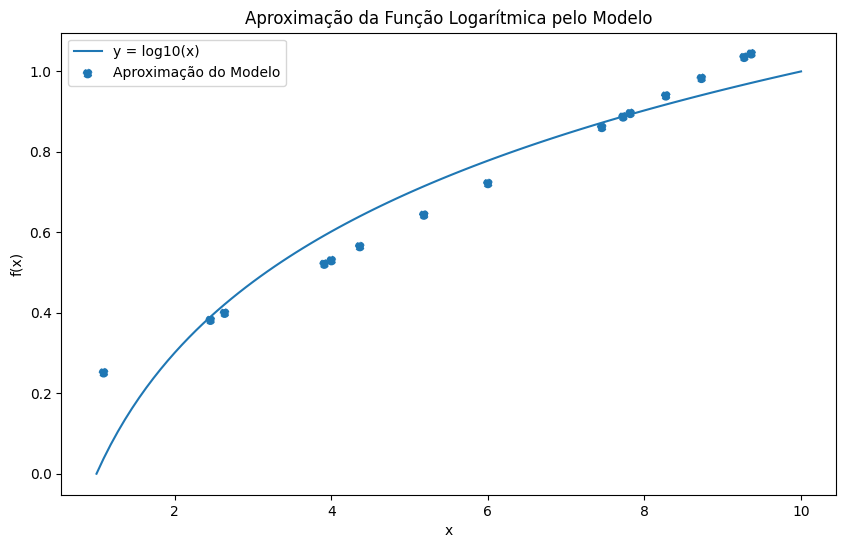

In [73]:
# Propagação para frente para fazer previsões com o modelo treinado
AL_test, _ = L_model_forward(x_test_b, parameters_b, hidden_activation='relu', output_activation='linear')

# Erro quadrático médio
mse = np.mean((AL_test - y_test_b)**2)
print(f"Erro Quadrático Médio: {mse:.4f}")

# Plotando a função verdadeira e as previsões do modelo
plt.figure(figsize=(10, 6))
plt.plot(x_samples_b, y_samples_b, label='y = log10(x)')
plt.scatter(x_test_b.flatten(), AL_test.flatten(), label='Aproximação do Modelo', linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Aproximação da Função Logarítmica pelo Modelo')
plt.legend()
plt.show()


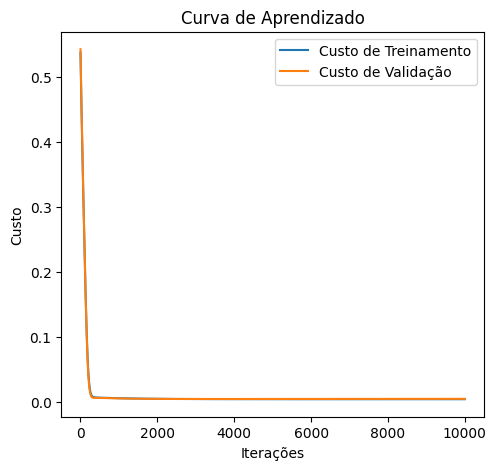

In [64]:
# Plotting the training and validation cost
plt.figure(figsize=(12, 5))

# Plot training cost
plt.subplot(1, 2, 1)
plt.plot(training_costs, label='Erro de Treinamento')
plt.plot(validation_costs, label='Erro de Validação')
plt.ylabel('Erro')
plt.xlabel('Iterações')
plt.title("Curva de Aprendizado")
plt.legend()
plt.show()

c) f(x) = 10x5+ 5x4+ 2x3– 0.5x2+ 3x + 2, onde 0 ≤ x ≤ 5


In [49]:
# Definindo a função complexa para aproximação
def function_c(x):
    return 10*x**5 + 5*x**4 + 2*x**3 - 0.5*x**2 + 3*x + 2

# Gerando dados de amostra (200 amostras uniformemente espaçadas entre 0 e 5)
x_samples_c = np.linspace(0, 5, 1000)  # 200 amostras entre 0 e 5
y_samples_c = function_c(x_samples_c)

# Dividindo os dados em conjuntos de treinamento e validação
indices_c = np.random.permutation(len(x_samples_c))
train_indices_c = indices_c[:int(0.7*len(x_samples_c))]
val_indices_c = indices_c[int(0.7*len(x_samples_c)):int(0.85*len(x_samples_c))]
test_indices_c = indices_c[int(0.85*len(x_samples_c)):]

x_train_c = x_samples_c[train_indices_c].reshape(1, -1)
y_train_c = y_samples_c[train_indices_c].reshape(1, -1)
x_val_c = x_samples_c[val_indices_c].reshape(1, -1)
y_val_c = y_samples_c[val_indices_c].reshape(1, -1)
x_test_c = x_samples_c[test_indices_c].reshape(1, -1)
y_test_c = y_samples_c[test_indices_c].reshape(1, -1)

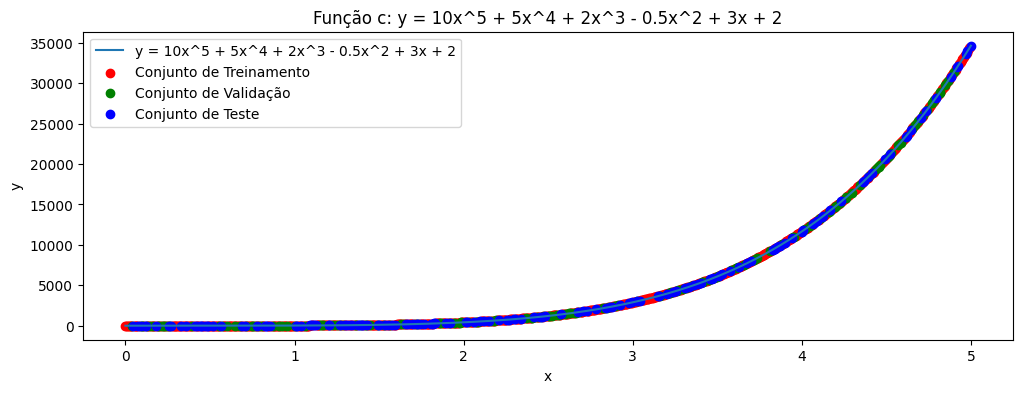

In [50]:
# Plotando a função c
plt.figure(figsize=(12, 4))
plt.plot(x_samples_c, y_samples_c, label='y = 10x^5 + 5x^4 + 2x^3 - 0.5x^2 + 3x + 2')
plt.scatter(x_train_c, y_train_c, color='r', label='Conjunto de Treinamento')
plt.scatter(x_val_c, y_val_c, color='g', label='Conjunto de Validação')
plt.scatter(x_test_c, y_test_c, color='b', label='Conjunto de Teste')
plt.title('Função c: y = 10x^5 + 5x^4 + 2x^3 - 0.5x^2 + 3x + 2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


Precisou de mais exemplos de treinamento para um resultado bom

In [51]:
# Definindo a arquitetura da rede para a função c
layer_dims_c = [x_train_c.shape[0], 100, 1]  # Exemplo: 1 neurônio na entrada, 20 e 10 na oculta, 1 na saída para a função c

# Inicializando os parâmetros para a função c
parameters_c = initialize_parameters_deep(layer_dims_c)

# Lista para armazenar os custos de treinamento e validação
training_costs_c = []
validation_costs_c = []

# Treinamento do modelo Por Lote (Batch)
for i in range(50000):
    # Forward propagation
    AL_c, caches_c = L_model_forward(x_train_c, parameters_c, hidden_activation='relu', output_activation='linear')
    
    # Compute cost.
    cost_train_c = compute_cost(AL_c, y_train_c, problema='regressao')
    training_costs_c.append(cost_train_c)
    
    # Backward propagation.
    grads_c = L_model_backward(AL_c, y_train_c, caches_c, hidden_activation='relu', output_activation='linear', problema='regressao')
    
    # Update parameters.
    parameters_c = update_parameters(parameters_c, grads_c, learning_rate=0.001)
    
    # Compute validation cost.
    AL_val_c, _ = L_model_forward(x_val_c, parameters_c, hidden_activation='relu', output_activation='linear')
    cost_val_c = compute_cost(AL_val_c, y_val_c, problema='regressao')
    validation_costs_c.append(cost_val_c)
    
    if i % 10000 == 0:
        print(f"Iteração {i} - Custo de Treinamento: {cost_train_c} - Custo de Validação: {cost_val_c}")

Iteração 0 - Custo de Treinamento: 112070287.52385974 - Custo de Validação: 119081862.90979554
Iteração 1000 - Custo de Treinamento: 6529975.797643694 - Custo de Validação: 5407839.295125981
Iteração 2000 - Custo de Treinamento: 1689114.5789396805 - Custo de Validação: 1239755.0992736514
Iteração 3000 - Custo de Treinamento: 755467.9029347234 - Custo de Validação: 564360.6882036964
Iteração 4000 - Custo de Treinamento: 444148.32585518784 - Custo de Validação: 332125.2078199083
Iteração 5000 - Custo de Treinamento: 302022.0350905159 - Custo de Validação: 220880.01205488772
Iteração 6000 - Custo de Treinamento: 224446.2595613312 - Custo de Validação: 159940.86790058578
Iteração 7000 - Custo de Treinamento: 176808.12025522065 - Custo de Validação: 123470.35230158648
Iteração 8000 - Custo de Treinamento: 145186.5913220948 - Custo de Validação: 100759.43873481182
Iteração 9000 - Custo de Treinamento: 123313.35766955923 - Custo de Validação: 85832.0611602253
Iteração 10000 - Custo de Treinam

Erro Quadrático Médio para a Função c: 29348.991564346892


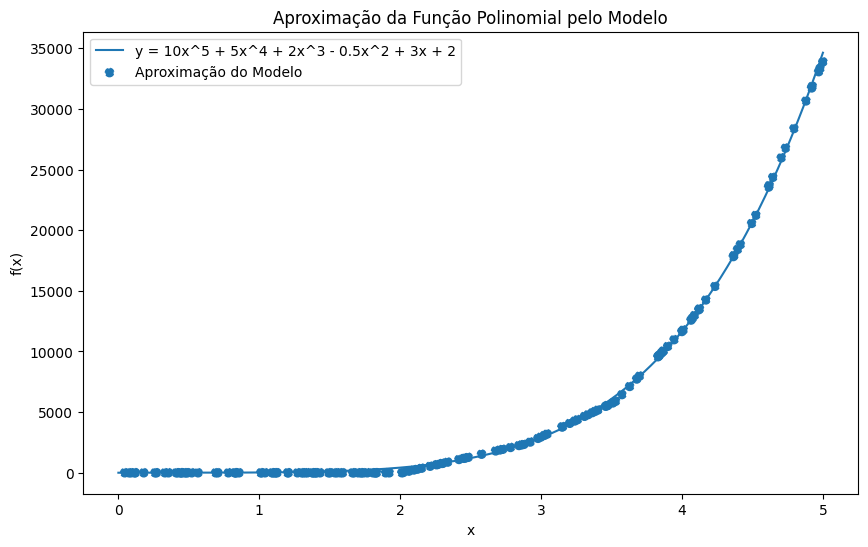

In [55]:
# Propagação para frente para fazer previsões com o modelo treinado
AL_test_c, _ = L_model_forward(x_test_c, parameters_c, hidden_activation='relu', output_activation='linear')

# Erro quadrático médio para a função c
mse_test_c = np.mean((AL_test_c - y_test_c)**2)
print(f"Erro Quadrático Médio para a Função c: {mse_test_c}")

# Plotando a função verdadeira e as previsões do modelo
plt.figure(figsize=(10, 6))
plt.plot(x_samples_c, y_samples_c, label='y = 10x^5 + 5x^4 + 2x^3 - 0.5x^2 + 3x + 2')
plt.scatter(x_test_c.flatten(), AL_test_c.flatten(), label='Aproximação do Modelo', linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Aproximação da Função Polinomial pelo Modelo')
plt.legend()
plt.show()


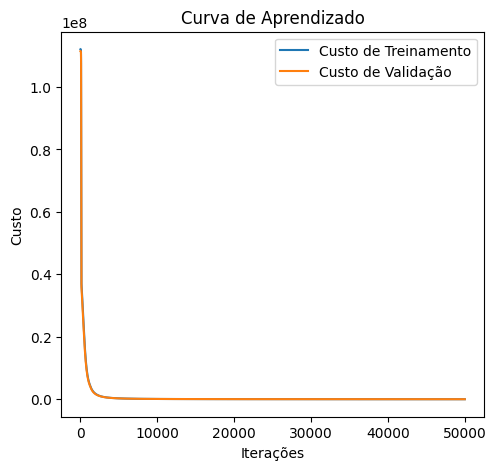

In [459]:
# Plotting the training and validation cost
plt.figure(figsize=(12, 5))

# Plot training cost
plt.subplot(1, 2, 1)
plt.plot(training_costs_c, label='Erro de Treinamento')
plt.plot(validation_costs_c, label='Erro de Validação')
plt.ylabel('Erro')
plt.xlabel('Iterações')
plt.title("Curva de Aprendizado")
plt.legend()
plt.show()


# Questão 3

In [4]:
# Define a função para gerar pontos aleatórios dentro de um círculo
def pontos_dentro_do_circulo(k):
    pontos = []
    for _ in range(k):
        angle = random.uniform(0, 2 * np.pi)
        r = np.sqrt(random.uniform(0, 1))  # Distribuição uniforme em área
        x = r * np.cos(angle)
        y = r * np.sin(angle)
        pontos.append((x, y))
    return pontos

# Função para calcular o y de um ponto na reta dada a entrada x
def calcular_y_do_ponto_da_reta(p1, p2, x_):
    m = (p2[1] - p1[1]) / (p2[0] - p1[0])
    b = p1[1] - m * p1[0]
    return m * x_ + b

# Gerar pontos aleatórios
n_ex = 1000  # Número de exemplos
pontos = pontos_dentro_do_circulo(n_ex)

# Círculo
theta = np.linspace(0, 2 * np.pi, 100)
x_circle = np.cos(theta)
y_circle = np.sin(theta)

# Desenha o losango
x_diamond = [0, 1, 0, -1, 0]
y_diamond = [1, 0, -1, 0, 1]


In [5]:
# Transformar pontos em uma matriz Numpy
X = np.array([list(p) for p in pontos])  # Transposta para ter a forma correta (2, n_ex)

# Criar a matriz de rótulos Y. Inicialmente tudo zero.
Y = np.zeros((8, len(pontos)))  # 8 classes, n_ex exemplos

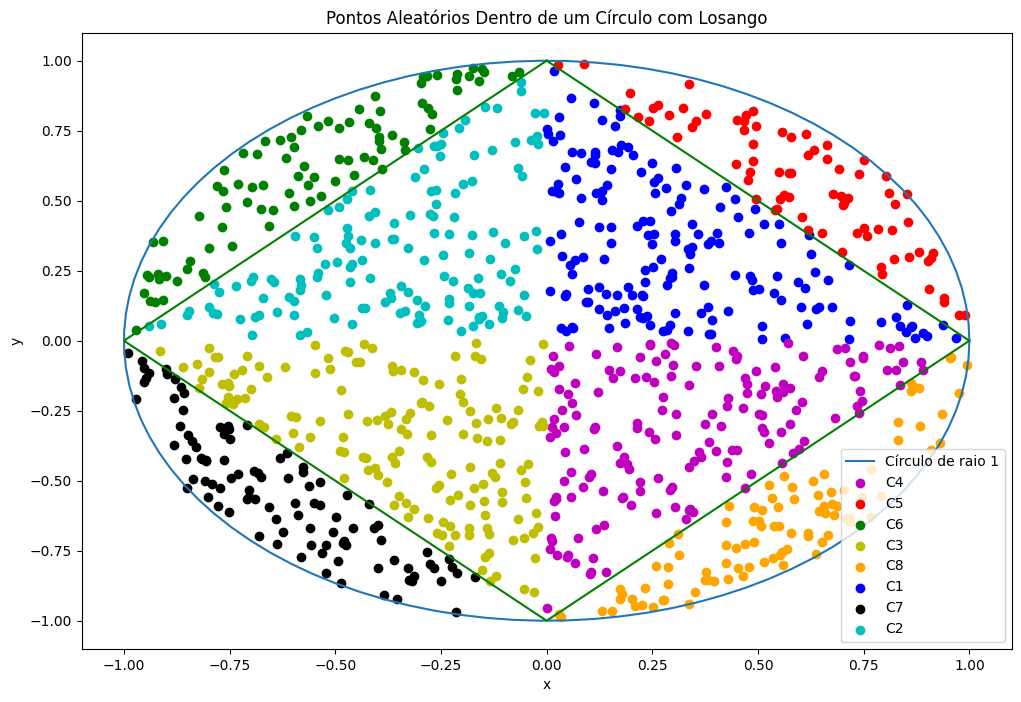

In [6]:
# Plotar o círculo, o losango e os pontos com labels para cada classe
plt.figure(figsize=(12, 8))
plt.plot(x_circle, y_circle, label='Círculo de raio 1')
plt.plot(x_diamond, y_diamond, color='g')  # Losango não precisa de label repetido

# Dicionário para mapear classes para cores e labels
class_dict = {
    0: ('b', 'C1'),
    1: ('c', 'C2'),
    2: ('y', 'C3'),
    3: ('m', 'C4'),
    4: ('r', 'C5'),
    5: ('g', 'C6'),
    6: ('k', 'C7'),
    7: ('orange', 'C8')
}

# Inicializa um dicionário para rastrear se a legenda já foi adicionada
legend_added = {key: False for key in class_dict}
lista = []
# Plotar os pontos classificados com labels
for x, y in pontos:
    # Calcula a classificação para determinar a cor e o label
    if x > 0 and y > 0 and y < calcular_y_do_ponto_da_reta((0,1),(1,0),x):
        class_idx = 0
        lista.append([1, 0, 0, 0, 0, 0, 0, 0])
    elif x < 0 and y > 0 and y < calcular_y_do_ponto_da_reta((0,1),(-1,0),x):
        class_idx = 1
        lista.append( [0, 1, 0, 0, 0, 0, 0, 0])
    elif x < 0 and y < 0 and y > calcular_y_do_ponto_da_reta((0,-1),(-1,0),x):
        class_idx = 2
        lista.append([0, 0, 1, 0, 0, 0, 0, 0])
    elif x > 0 and y < 0 and y > calcular_y_do_ponto_da_reta((0,-1),(1,0),x):
        class_idx = 3
        lista.append([0, 0, 0, 1, 0, 0, 0, 0])
    elif x > 0 and y > 0 and y > calcular_y_do_ponto_da_reta((0,1),(1,0),x):
        class_idx = 4
        lista.append( [0, 0, 0, 0, 1, 0, 0, 0])
    elif x < 0 and y > 0 and y > calcular_y_do_ponto_da_reta((0,1),(-1,0),x):
        class_idx = 5
        lista.append( [0, 0, 0, 0, 0, 1, 0, 0])
    elif x < 0 and y < 0 and y < calcular_y_do_ponto_da_reta((0,-1),(-1,0),x):
        class_idx = 6
        lista.append( [0, 0, 0, 0, 0, 0, 1, 0])
    elif x > 0 and y < 0 and y < calcular_y_do_ponto_da_reta((0,-1),(1,0),x):
        class_idx = 7
        lista.append( [0, 0, 0, 0, 0, 0, 0, 1])
    else:
        continue  # Se não for em nenhum setor, pula o ponto

    # Obtém a cor e o label da classe
    color, label = class_dict[class_idx]

    # Plota o ponto e adiciona a legenda se ainda não foi adicionada
    if not legend_added[class_idx]:
        plt.scatter(x, y, color=color, label=label)
        legend_added[class_idx] = True
    else:
        plt.scatter(x, y, color=color)

plt.title('Pontos Aleatórios Dentro de um Círculo com Losango')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [7]:
Y = np.array(lista)

In [8]:
# Separar os dados em conjuntos de treinamento, validação e teste
indices = np.random.permutation(len(X))
train_indices = indices[:int(0.7*len(X))]
val_indices = indices[int(0.7*len(X)):int(0.85*len(X))]
test_indices = indices[int(0.85*len(X)):]
X_train = X[train_indices].T
Y_train = Y[train_indices].T
X_val = X[val_indices].T
Y_val = Y[val_indices].T
X_test = X[test_indices].T
Y_test = Y[test_indices].T

In [9]:
X_train.shape

(2, 700)

In [10]:
Y_train.shape

(8, 700)

### Regra delta

Regra Delta é dada pela fórmula:

$$ \Delta w = \eta \cdot (y - \hat{y}) \cdot x $$

Onde:
- $ \Delta w $ é a mudança aplicada ao peso.
- $ \eta $ é a taxa de aprendizado, um parâmetro que determina o tamanho do passo da atualização do peso.
- $ y $ é o valor real (ou desejado) da saída.
- $ \hat{y} $ é a saída prevista pela rede neural.
- $ x $ é a entrada do neurônio.



In [33]:
def initialize_parameters(n_x, n_y):
    W = np.random.randn(n_y, n_x) * 0.01 # Inicializa W com valores aleatórios pequenos
    b = np.zeros((n_y, 1)) # Inicializa b com zeros
    return {"W": W, "b": b}

def forward_propagation(X, parameters):
    W = parameters['W']
    b = parameters['b']
    Z = np.dot(W, X) + b  # Combinador Linear + Bias(limiar de ativação)
    return Z  # Retorna o valor de Z diretamente

def update_parameters_one_vs_all(parameters, X, Y, learning_rate):
    m = X.shape[1]  # Número de exemplos de treinamento
    W = parameters['W']
    b = parameters['b']
    
    for j in range(Y.shape[0]):  # Iterar sobre cada classe
        for i in range(m):  # Iterar sobre cada exemplo de treinamento
            xi = X[:, [i]]
            yi = np.where(Y[j, i] == 1, 1, -1)  # yi é 1 se a classe atual for a classe correta, caso contrário -1
            Z = forward_propagation(xi, {"W": W[[j], :], "b": b[[j], :]})
            A = np.where(Z > 0, 1, -1)  # Aplica a função de ativação (Função degrau)
            error = yi - A
            
            # Verifica se a previsão está errada antes de atualizar
            if np.sign(Z) != yi:  # Usa Z para verificar o erro
                W[j, :] = W[j, :] + learning_rate * error * xi.T
                b[j, :] = b[j, :] + learning_rate * error
            
    return {"W": W, "b": b}

def nn_model(X, Y, num_iterations=100, learning_rate=0.01):
    n_x, n_y = X.shape[0], Y.shape[0]
    parameters = initialize_parameters(n_x, n_y)
    for i in range(num_iterations):
        parameters = update_parameters_one_vs_all(parameters, X, Y, learning_rate)
    return parameters

In [34]:
# Função para treinar o modelo e calcular a acurácia no conjunto de validação
def train_and_evaluate(X_train, Y_train, X_val, Y_val, num_iterations=100, learning_rate=0.01):
    parameters = nn_model(X_train, Y_train, num_iterations, learning_rate)
    
    # Previsões no conjunto de validação
    A_val = forward_propagation(X_val, parameters)
    predictions_val = (A_val == 1).astype(int)
    Y_val_class = (Y_val == 1).astype(int)

    # Converter previsões e rótulos verdadeiros em índices de classes para calcular a matriz de confusão
    predictions_val_indices = np.argmax(predictions_val, axis=0)
    Y_val_indices = np.argmax(Y_val_class, axis=0)
    
    # Calcular a matriz de confusão e a acurácia
    cm = confusion_matrix(Y_val_indices, predictions_val_indices)
    accuracy = accuracy_score(Y_val_indices, predictions_val_indices)
    
    return cm, accuracy, parameters

# Treinar o modelo e avaliar no conjunto de validação
cm, accuracy, parameters = train_and_evaluate(X_train, Y_train, X_val, Y_val, num_iterations=2000, learning_rate=0.1)
print(f"Acurácia no conjunto de validação: {accuracy * 100:.2f}%")

Acurácia no conjunto de validação: 14.67%


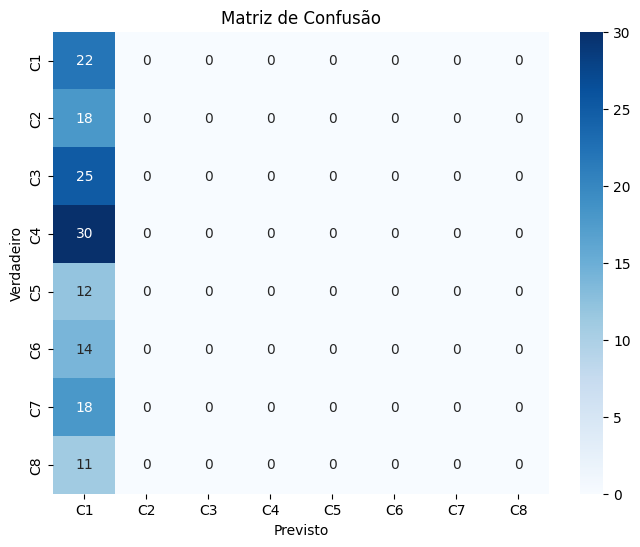

In [35]:
# Dicionário para mapear classes para cores e labels
class_dict = {
    0: 'C1',
    1: 'C2',
    2: 'C3',
    3: 'C4',
    4: 'C5',
    5: 'C6',
    6: 'C7',
    7: 'C8'
}

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_dict.values(), yticklabels=class_dict.values())
plt.title('Matriz de Confusão')
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.show()


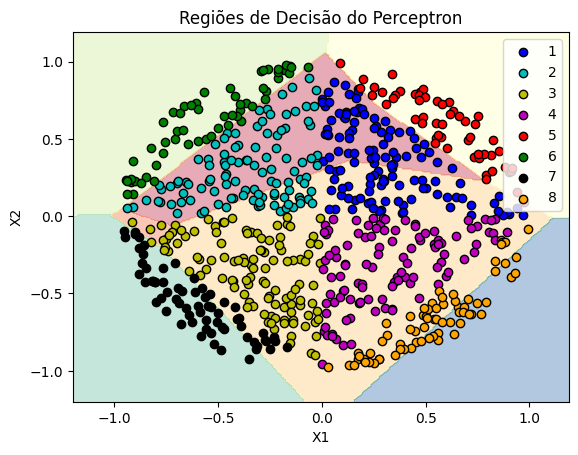

In [36]:
# Definir os limites da grade e criar uma grade de pontos
x_min, x_max = -1.2, 1.2
y_min, y_max = -1.2, 1.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Prever classes para cada ponto na grade
grid_points = np.c_[xx.ravel(), yy.ravel()].T  # Preparar pontos da grade para classificação
A = forward_propagation(grid_points, parameters)  # Obter saída do modelo para cada ponto
predictions = np.argmax(A, axis=0)  # Obter a classe com a maior saída
Z = predictions.reshape(xx.shape)  # Reshape de acordo com a grade de pontos

# Plotar as regiões de decisão
plt.contourf(xx, yy, Z, alpha=0.4, cmap='Spectral')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Plotar os pontos de treinamento
for i, color in enumerate(['blue', 'c', 'y', 'm', 'r', 'g', 'k', 'orange']):
    idx = np.where(Y_train[i, :] == 1)
    plt.scatter(X_train[0, idx], X_train[1, idx], c=color, label=class_dict[i][1], edgecolor='black')

plt.title('Regiões de Decisão do Perceptron')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='upper right')
plt.show()


### Com momento

Fórmula do termo do momentum na atualização dos pesos de uma rede neural, que é uma técnica usada para acelerar a convergência do treinamento:

$$ \Delta w_{ji}(n) = \alpha \Delta w_{ji}(n - 1) + \eta \delta_j(n) y_i(n) $$

Aqui está o que cada termo representa:

- $ \Delta w_{ji}(n) $: A atualização do peso para o peso conectando a unidade $ i $ à unidade $ j $ no passo de tempo $ n $.
- $ \alpha $: O fator de momentum, que determina quanto da atualização de peso anterior é mantido.
- $ \Delta w_{ji}(n - 1) $: A atualização de peso anterior para o mesmo peso.
- $ \eta $: A taxa de aprendizado.
- $ \delta_j(n) $: O gradiente da função de custo em relação ao peso atual $ w_{ji} $, que pode ser interpretado como o sinal de erro para a unidade $ j $ no passo de tempo $ n $.
- $ y_i(n) $: A saída da unidade $ i $ no passo de tempo $ n $, que é a entrada para o peso $ w_{ji} $.

No código os termos correspondem da seguinte forma:

- $ \alpha $ corresponde a `beta` na função `update_parameters_with_momentum`.
- $ \Delta w_{ji}(n - 1) $ é representado por `v_dW[j, :]` para os pesos e `v_db[j, 0]` para os bias antes de serem atualizados.
- $ \eta $ é `learning_rate`.
- $ \delta_j(n) $ é calculado como `error[j, 0]`.
- $ y_i(n) $ é o vetor `xi.T`.

In [37]:
def initialize_parameters_with_momentum(n_x, n_y):
    W = np.random.randn(n_y, n_x) * 0.01  # Inicializa W com valores aleatórios pequenos
    b = np.zeros((n_y, 1))  # Inicializa b com zeros
    
    # Inicializa o momento para W e b como zeros
    v_dW = np.zeros((n_y, n_x))
    v_db = np.zeros((n_y, 1))
    
    return {"W": W, "b": b, "v_dW": v_dW, "v_db": v_db}

def forward_propagation(X, parameters):
    W = parameters['W']
    b = parameters['b']
    Z = np.dot(W, X) + b # Combinador Linear + Bias(limiar de ativação)
    A = np.where(Z > 0, 1, -1)  # Ativação de saída (Função degrau)
    return A # Sinal de saída

def update_parameters_with_momentum(parameters, X, Y, learning_rate, beta):
    m = X.shape[1]  # Número de exemplos de treinamento
    W = parameters['W']
    b = parameters['b']
    v_dW = parameters['v_dW']
    v_db = parameters['v_db']

    # Iterar sobre cada classe para estratégia um contra todos
    for j in range(Y.shape[0]):  # Iterar sobre cada saída/classe
        # Considerar exemplos da classe j como positivos e os outros como negativos
        Y_binary = np.where(Y[j, :] == 1, 1, -1)
        # Inicializar os acumuladores de gradiente para a classe j
        dW_temp = np.zeros(W[j, :].shape)
        db_temp = 0

        for i in range(m):  # Iterar sobre cada exemplo de treinamento
            xi = X[:, [i]]  # Pegar a coluna i de X
            yi = Y_binary[i]  # Y_binary é um vetor, então usamos [i]
            A = forward_propagation(xi, {"W": W[[j], :], "b": b[[j], :]})
            error = yi - A

            # Acumula os gradientes
            dW_temp += (error * xi).flatten() / m
            db_temp += error.flatten()[0] / m

        # Aplicar momentum para a classe j
        v_dW[j, :] = beta * v_dW[j, :] + (1 - beta) * dW_temp
        v_db[j, 0] = beta * v_db[j, 0] + (1 - beta) * db_temp

        # Verifica se a previsão está errada antes de atualizar
        if np.sign(A) != yi:
            W[j, :] = W[j, :] + learning_rate * v_dW[j, :]
            b[j, :] = b[j, :] + learning_rate * v_db[j, 0]

    parameters['W'] = W
    parameters['b'] = b
    parameters['v_dW'] = v_dW
    parameters['v_db'] = v_db

    return parameters

def nn_model_with_momentum(X, Y, num_iterations=100, learning_rate=0.01, beta=0.9):
    n_x, n_y = X.shape[0], Y.shape[0]
    parameters = initialize_parameters_with_momentum(n_x, n_y)
    for i in range(num_iterations):
        parameters = update_parameters_with_momentum(parameters, X, Y, learning_rate, beta)
    return parameters

In [38]:
def train_and_evaluate_with_momentum(X_train, Y_train, X_val, Y_val, num_iterations=100, learning_rate=0.01, beta=0.9):
    parameters = nn_model_with_momentum(X_train, Y_train, num_iterations, learning_rate, beta)
    
    # Previsões no conjunto de validação
    A_val = forward_propagation(X_val, parameters)
    predictions_val = (A_val == 1).astype(int)
    Y_val_class = (Y_val == 1).astype(int)

    # Converter previsões e rótulos verdadeiros em índices de classes para calcular a matriz de confusão
    predictions_val_indices = np.argmax(predictions_val, axis=0)
    Y_val_indices = np.argmax(Y_val_class, axis=0)
    
    # Calcular a matriz de confusão e a acurácia
    cm = confusion_matrix(Y_val_indices, predictions_val_indices)
    accuracy = accuracy_score(Y_val_indices, predictions_val_indices)
    
    return cm, accuracy, parameters

# Treinar o modelo e avaliar no conjunto de validação
cm, accuracy, parameters = train_and_evaluate_with_momentum(X_train, Y_train, X_val, Y_val, num_iterations=3000, learning_rate=0.1, beta=0.9)
print(f"Acurácia no conjunto de validação: {accuracy * 100:.2f}%")

KeyboardInterrupt: 

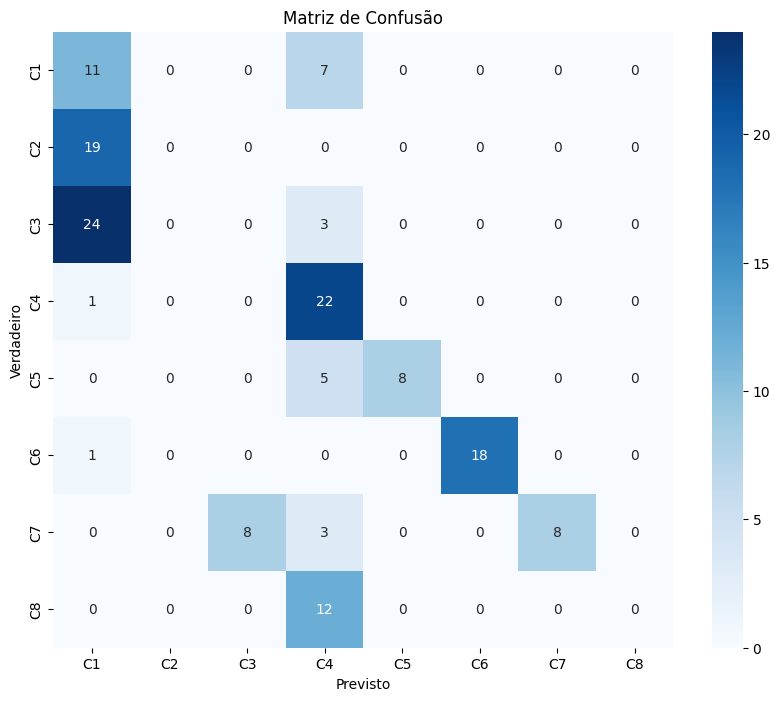

In [ ]:
# Plotar a matriz de confusão
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_dict.values
(), yticklabels=class_dict.values())
plt.title('Matriz de Confusão')
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.show()

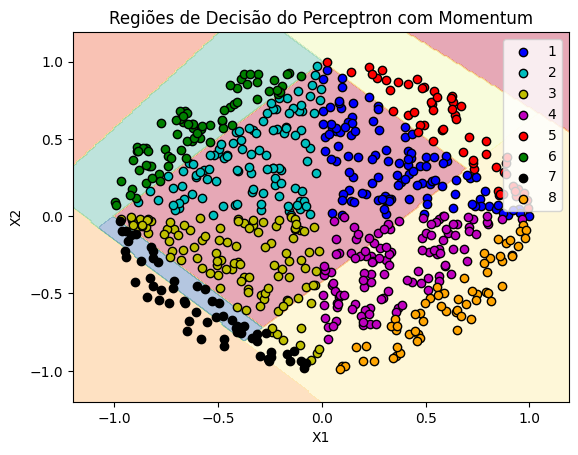

In [ ]:
# Definir os limites da grade e criar uma grade de pontos
x_min, x_max = -1.2, 1.2
y_min, y_max = -1.2, 1.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Prever classes para cada ponto na grade
grid_points = np.c_[xx.ravel(), yy.ravel()].T  # Preparar pontos da grade para classificação
A = forward_propagation(grid_points, parameters)  # Obter saída do modelo para cada ponto
predictions = np.argmax(A, axis=0)  # Obter a classe com a maior saída
Z = predictions.reshape(xx.shape)  # Reshape de acordo com a grade de pontos

# Plotar as regiões de decisão
plt.contourf(xx, yy, Z, alpha=0.4, cmap='Spectral')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Plotar os pontos de treinamento
for i, color in enumerate(['blue', 'c', 'y', 'm', 'r', 'g', 'k', 'orange']):
    idx = np.where(Y_train[i, :] == 1)
    plt.scatter(X_train[0, idx], X_train[1, idx], c=color, label=class_dict[i][1], edgecolor='black')

plt.title('Regiões de Decisão do Perceptron com Momentum')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='upper right')
plt.show()

### MLP

In [31]:
# Definindo a arquitetura da rede
layers_dims = [X_train.shape[0], 10, Y_train.shape[0]]  # 2 neurônios na camada de entrada, 5 na camada oculta e 1 na camada de saída

# Inicializando os parâmetros
parameters = initialize_parameters_deep(layers_dims)

# Listas para armazenar custos
costs_train = []

# Treinamento da rede Por Lote (Batch)
for i in range(8000):
     # Propagação para frente (treinamento)
    AL, caches = L_model_forward(X_train, parameters, hidden_activation='relu', output_activation='softmax_output')
    
    # Cálculo do custo (treinamento)
    cost_train = compute_cost(AL, Y_train, problema='classificacao_multiclasse')
    costs_train.append(cost_train)
    
    # Propagação para trás
    grads = L_model_backward(AL, Y_train, caches, hidden_activation='relu', 
                               output_activation='softmax_output', problema='classificacao_multiclasse')
    
    # Atualização dos parâmetros
    parameters = update_parameters(parameters, grads, learning_rate = 0.1)
    
    
    # Imprimir o custo a cada 1000 iterações
    if i % 1000 == 0:
        print(f"Iteração {i} - Custo: {cost_train}")


Iteração 0 - Custo: 2.0794909530831447
Iteração 1000 - Custo: 0.5991510902424756
Iteração 2000 - Custo: 0.3031726025090879
Iteração 3000 - Custo: 0.21567251207295857
Iteração 4000 - Custo: 0.1726652673902467
Iteração 5000 - Custo: 0.14649035491623935
Iteração 6000 - Custo: 0.1285909256241182
Iteração 7000 - Custo: 0.11529855682121627


Acurácia no conjunto de teste: 98.67%
Acurácia no conjunto de treinamento: 99.29%


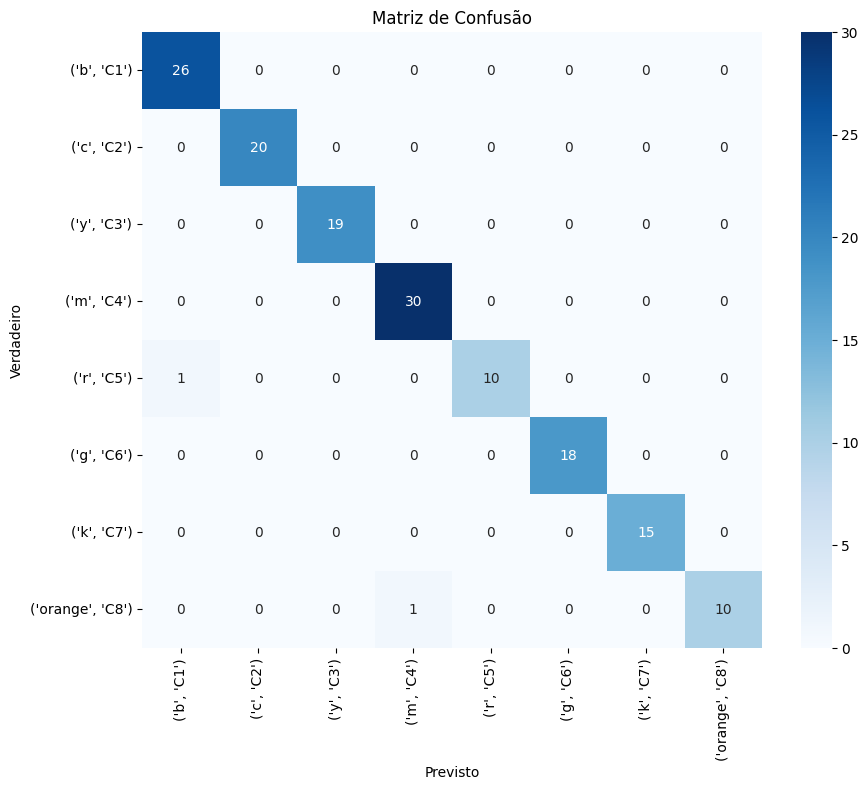

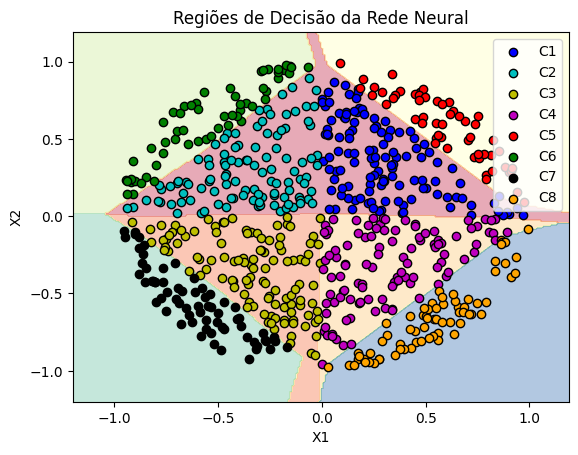

In [32]:
# Propagação para frente para fazer previsões com o modelo treinado
AL_test, _ = L_model_forward(X_test, parameters, hidden_activation='relu', output_activation='softmax_output')

# Previsões
predictions = np.argmax(AL_test, axis=0)
Y_test_indices = np.argmax(Y_test, axis=0)

# Acurácia
accuracy = np.mean(predictions == Y_test_indices)
print(f"Acurácia no conjunto de teste: {accuracy * 100:.2f}%")

# Acurácia nos dados de treinamento
accuracy_train = np.mean(np.argmax(AL, axis=0) == np.argmax(Y_train, axis=0))
print(f"Acurácia no conjunto de treinamento: {accuracy_train * 100:.2f}%")

# Plotar a matriz de confusão
cm = confusion_matrix(Y_test_indices, predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_dict.values
(), yticklabels=class_dict.values())
plt.title('Matriz de Confusão')
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.show()

# Definir os limites da grade e criar uma grade de pontos
x_min, x_max = -1.2, 1.2
y_min, y_max = -1.2, 1.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Prever classes para cada ponto na grade usando a função correta
grid_points = np.c_[xx.ravel(), yy.ravel()].T
AL, _ = L_model_forward(grid_points, parameters, hidden_activation='relu', output_activation='softmax_output')
predictions_grid = np.argmax(AL, axis=0)
Z = predictions_grid.reshape(xx.shape)

# Plotar as regiões de decisão
plt.contourf(xx, yy, Z, alpha=0.4, cmap='Spectral')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Plotar os pontos de treinamento
for i, color in enumerate(['blue', 'c', 'y', 'm', 'r', 'g', 'k', 'orange']):
    idx = np.where(Y_train[i, :] == 1)
    plt.scatter(X_train[0, idx], X_train[1, idx], c=color, label=class_dict[i][1], edgecolor='black')

plt.title('Regiões de Decisão da Rede Neural')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='upper right')
plt.show()

# Questão 4

No contexto de redes neurais e previsão de séries temporais, a entrada \( X \) e a saída \( Y \) são geralmente definidas da seguinte maneira:

- \( X \) (Entradas): São as amostras de dados que você usará para fazer a previsão. No seu exemplo, você está usando uma janela deslizante de \( K \) valores anteriores para prever os próximos valores. Então, se \( K = 10 \), cada entrada \( X \) seria um vetor contendo 10 medidas de tempo consecutivas da série temporal, por exemplo, \( [x(n-9), x(n-8), ..., x(n)] \).

- \( Y \) (Saídas): São os valores que você quer prever. No exemplo dado, para cada vetor de entrada \( X \), a saída \( Y \) seria os próximos valores da série temporal. Se a tarefa é prever um passo à frente, \( Y \) seria \( x(n+1) \); se a tarefa é prever três passos à frente, \( Y \) seria um vetor contendo \( [x(n+1), x(n+2), x(n+3)] \).

Assim, para o exemplo de treinamento 1:
- \( X \) seria \( [x(0), x(1), ..., x(9)] \)
- \( Y \) seria \( [x(10), x(11), x(12)] \)

In [396]:
# Definindo a função da série temporal conforme fornecida
def time_series(n):
    return np.sin(n) + np.cos(n + np.cos(n))

# Função de treinamento
def train(X_train, Y_train, X_val, Y_val, parameters, learning_rate=0.1, n_iterations=10000):
    costs = []  # para manter o registro do custo
    cost_Val = []
    for i in range(n_iterations):
        # Passo para frente
        AL, caches = L_model_forward(X_train, parameters, hidden_activation='relu', output_activation='linear')
        
        # Calcular o custo
        cost = compute_cost(AL, Y_train, problema='regressao')
        costs.append(cost)
        
        # Retropropagação
        grads = L_model_backward(AL, Y_train, caches, hidden_activation='relu', output_activation='linear', problema='regressao')
        
        # Atualizar parâmetros
        parameters = update_parameters(parameters, grads, learning_rate)

        # Propagação pra frente validação
        AL_val, _ = L_model_forward(X_val, parameters, hidden_activation='relu', output_activation='linear')

        # Calculo do custo validação
        cost_val = compute_cost(AL_val, Y_val, problema='regressao')
        cost_Val.append(cost_val)
        
        # Imprimir o custo a cada 100 iterações
        if i % 1000 == 0:
            print(f"Iteração {i} - Custo de Treinamento: {cost} - Custo de Validação: {cost_val}")
    
    return parameters, costs

# Função para inicializar e treinar o modelo, fazer previsões e plotar
def run_model(N, K, p, learning_rate=0.1, n_iterations=10000):
    time_steps = np.arange(N)
    data = time_series(time_steps)

    # Preparando os dados de entrada (X) e saída (Y)
    X = np.array([data[i:i+K] for i in range(N-K-p)])
    Y = np.array([data[i+K:i+K+p] for i in range(N-K-p)])

    # Dados de treinamento 70%
    X_train = X[:int(0.7 * len(X))].T
    Y_train = Y[:int(0.7 * len(Y))].T

    # Dados de validação 15%
    X_val = X[int(0.7 * len(X)):int(0.85 * len(X))].T
    Y_val = Y[int(0.7 * len(Y)):int(0.85 * len(Y))].T

    # Dados de teste 15%
    X_test = X[int(0.85 * len(X)):].T
    Y_test = Y[int(0.85 * len(Y)):].T

    # Definição das dimensões das camadas
    layer_dims = [X_train.shape[0], 100, Y_train.shape[0]]

    # Inicialização dos parâmetros
    parameters = initialize_parameters_deep(layer_dims)

    # Treinamento do modelo
    trained_parameters, costs = train(X_train, Y_train, X_val, Y_val, parameters, learning_rate, n_iterations)

    # Previsões com o modelo treinado
    predictions = predict(X_test, trained_parameters)

    # Plotagem dos resultados
    plt.figure(figsize=(14, 6))
    inicio_teste = N - len(X_test.T) - p
    fim_teste = N - p

    # Dados de Treino
    plt.plot(time_steps[:inicio_teste], data[:inicio_teste], label='Dados de Treino', color='blue')
    # Dados de Teste
    plt.plot(time_steps[inicio_teste:fim_teste], data[inicio_teste:fim_teste], label='Dados de Teste', color='green')

    # Previsões
    if p == 1:
        # Precisamos ajustar o loop de plotagem para o caso de p = 1 pois não é possível traçar uma linha
        for i in range(len(X_test.T)):
            # O início das previsões é ajustado para começar após os dados de validação
            start_index = inicio_teste + i
            end_index = start_index + p
            # Garantindo que não ultrapassamos o fim dos dados e ajustando para p = 1
            if start_index < fim_teste:
                # Como p = 1, plotamos o único ponto de previsão para cada amostra de teste
                plt.scatter(time_steps[start_index], predictions[:, i], color='red', label='Previsão' if i == 0 else "", zorder=5)

        plt.title('Comparação das Previsões da Rede Neural com a Série Temporal')
        plt.xlabel('Tempo')
        plt.ylabel('Valor')
        plt.legend()
        plt.show()
    else:
        for i in range(len(X_test.T)):
            start_index = inicio_teste + i
            end_index = start_index + p
            if end_index <= fim_teste:
                plt.plot(time_steps[start_index:end_index], predictions[:, i], 'r--', label='Previsão' if i == 0 else "", linewidth=2)

        plt.title('Comparação das Previsões da Rede Neural com a Série Temporal')
        plt.xlabel('Tempo')
        plt.ylabel('Valor')
        plt.legend()
        plt.show()

    mae = np.mean(np.abs(predictions - Y_test))
    print(f"Erro Absoluto Médio (MAE) para previsão de {p} passos: {mae}")

    return predictions


### Previsão de 1 passo:

Iteração 0 - Custo de Treinamento: 0.8235268637173695 - Custo de Validação: 0.8606187688301725
Iteração 1000 - Custo de Treinamento: 0.7013252058543346 - Custo de Validação: 0.7319292559320638
Iteração 2000 - Custo de Treinamento: 0.19075986760688218 - Custo de Validação: 0.1944296918812435
Iteração 3000 - Custo de Treinamento: 0.03139605815798601 - Custo de Validação: 0.03034747790845736
Iteração 4000 - Custo de Treinamento: 0.014876198101598176 - Custo de Validação: 0.013627468250767364
Iteração 5000 - Custo de Treinamento: 0.008792312576828614 - Custo de Validação: 0.007953605059489562
Iteração 6000 - Custo de Treinamento: 0.006089322530700561 - Custo de Validação: 0.005465239738631023
Iteração 7000 - Custo de Treinamento: 0.004784796471639087 - Custo de Validação: 0.0042815309654776436
Iteração 8000 - Custo de Treinamento: 0.004067004878911994 - Custo de Validação: 0.003643953064652874
Iteração 9000 - Custo de Treinamento: 0.003618787310060632 - Custo de Validação: 0.00324799348336

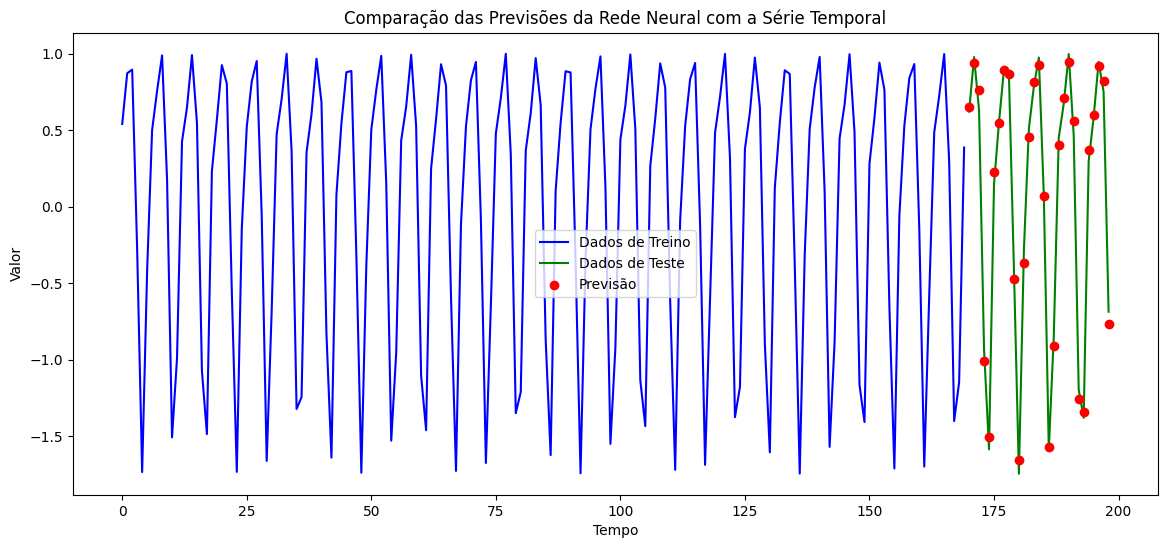

Erro Absoluto Médio (MAE) para previsão de 1 passos: 0.05235389048598709


In [397]:
predictions = run_model(N=200, K=10, p=1, learning_rate=0.1, n_iterations=10000)

### Previsão de 2 passos:

Iteração 0 - Custo de Treinamento: 1.6423718948920083 - Custo de Validação: 1.7157805969102617
Iteração 1000 - Custo de Treinamento: 1.3676823898153694 - Custo de Validação: 1.4273210340445048
Iteração 2000 - Custo de Treinamento: 0.3457492386865757 - Custo de Validação: 0.3655156544735576
Iteração 3000 - Custo de Treinamento: 0.06540914964276784 - Custo de Validação: 0.0677933284125715
Iteração 4000 - Custo de Treinamento: 0.020656623689044612 - Custo de Validação: 0.019509258397129216
Iteração 5000 - Custo de Treinamento: 0.010396485777559574 - Custo de Validação: 0.009349487939696853
Iteração 6000 - Custo de Treinamento: 0.006725726150584789 - Custo de Validação: 0.005900538469465509
Iteração 7000 - Custo de Treinamento: 0.00505138272145133 - Custo de Validação: 0.004383954101943134
Iteração 8000 - Custo de Treinamento: 0.0041139914130932775 - Custo de Validação: 0.003562383052004942
Iteração 9000 - Custo de Treinamento: 0.0034977911948214932 - Custo de Validação: 0.0030387747543723

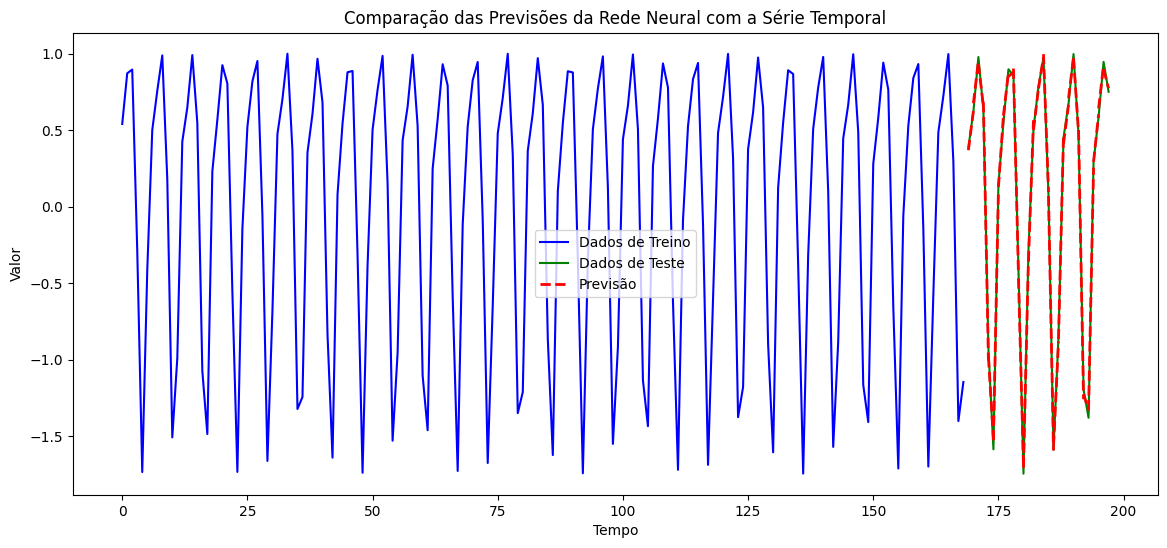

Erro Absoluto Médio (MAE) para previsão de 2 passos: 0.034923337757546635


In [398]:
predictions = run_model(N=200, K=10, p=2, learning_rate=0.1, n_iterations=10000)

### Previsão de 3 passos:

Iteração 0 - Custo de Treinamento: 2.4604683556327185 - Custo de Validação: 2.5602611674200784
Iteração 1000 - Custo de Treinamento: 1.9498696851274275 - Custo de Validação: 2.0289052125386484
Iteração 2000 - Custo de Treinamento: 0.23962362999444628 - Custo de Validação: 0.24168569128976983
Iteração 3000 - Custo de Treinamento: 0.06705826854431098 - Custo de Validação: 0.06345205462482707
Iteração 4000 - Custo de Treinamento: 0.038111246945744186 - Custo de Validação: 0.03468831469685799
Iteração 5000 - Custo de Treinamento: 0.02555896503574157 - Custo de Validação: 0.022364117442401223
Iteração 6000 - Custo de Treinamento: 0.019714706493843857 - Custo de Validação: 0.01677420748153934
Iteração 7000 - Custo de Treinamento: 0.016656228403025594 - Custo de Validação: 0.013981627031828371
Iteração 8000 - Custo de Treinamento: 0.014727737589875339 - Custo de Validação: 0.012299440038577197
Iteração 9000 - Custo de Treinamento: 0.013268947915310638 - Custo de Validação: 0.01106997105831298

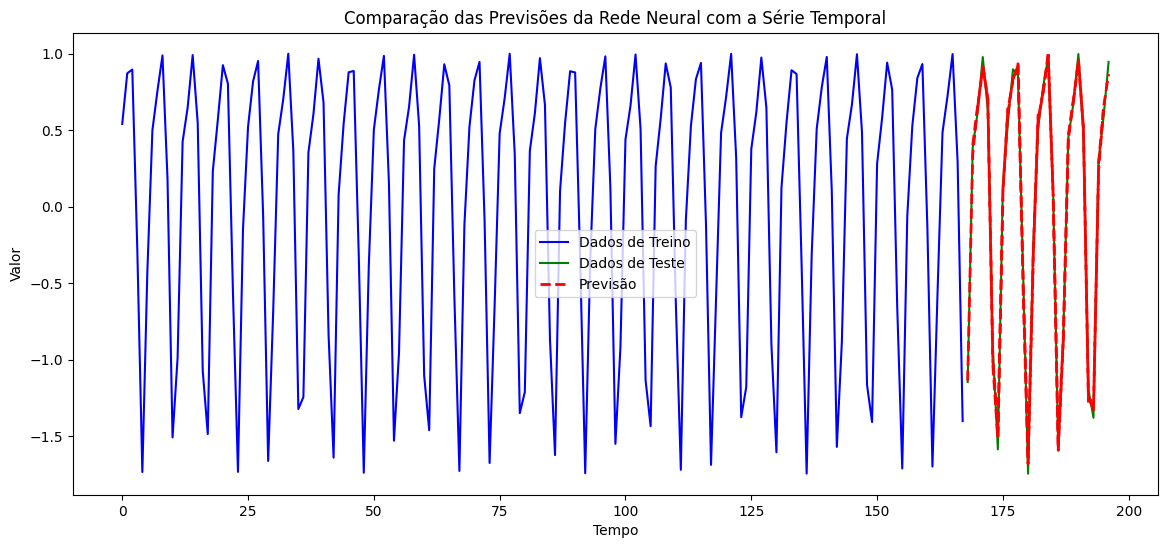

Erro Absoluto Médio (MAE) para previsão de 3 passos: 0.05578990787287208


In [399]:
predictions = run_model(N=200, K=10, p=3, learning_rate=0.1, n_iterations=10000)